<a href="https://colab.research.google.com/github/gkmurphy/PUS2024_GMurphy/blob/main/HW2_CitiBikes_GwenMurphy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental Design
**Observation/Question:** There appears to be more people biking in non-winter months. This may be because people are biking for pleasure (customers) to enjoy warmer weather, whereas those biking in winter are using a bike as their main form of transportation (subscribers). So, there are more overall bikers in non-winter from both groups, compared to mostly subscribers biking in winter. Are there significantly more subscribers biking in winter than customers as compared to the same groups biking in non-winter?

Winter is defined as December, January, February whereas non-winter is all other months.

---------------------------------------------------------------------

Due to memory issues we'll be comparing January (winter) to July (non-winter) instead of 3 months vs 9 months it's 1 month vs 1 month.

---------------------------------------------------------------------


**Significance Threshold:** 0.05

**Null Hypothesis:** The proportion of subscribers (S) biking in winter is the same or less than the proportion of customers (C) compared to the proportion of subscribers biking in non-winter months compared to customers.
# _$H_0$_ : $\frac{S_{\mathrm{winter}}}{S_{\mathrm{total}}} <= \frac{C_{\mathrm{winter}}}{C_{\mathrm{total}}}$


**Alternative Hypothesis:** The proportion of subscribers (S) biking in winter is higher than the proportion of customers (C) compared to the proportion of subscribers biking in non-winter months compared to customers.
# _$H_1$_ : $\frac{S_{\mathrm{winter}}}{S_{\mathrm{total}}} > \frac{C_{\mathrm{winter}}}{C_{\mathrm{total}}}$






# Data Upload - Too Large Issues
Let me know if you have feedback on how to make the original comparison work.

In [7]:
#I used a lot of google and a little ChatGBT to help making a fx to combine the files
#To deal with size constraints and weirdly named files, extra zips - crash central
#Admittedly this is a little slow to get all of the data.. maybe 20 min

def process_and_append_citibike_data(months, folder_path, output_file, chunk_size=100000):
    # Loop through the months and load the corresponding CSV files from the folder
    for month in months:
        # Search for files that match the month (e.g., '202301')
        for file_name in os.listdir(folder_path):
            # Check if the file name starts with the month and ends with '.csv'
            if file_name.startswith(month) and file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)
                print(f"Processing file: {file_path}")

                # Read the CSV file in chunks
                chunk_iter = pd.read_csv(file_path, chunksize=chunk_size, low_memory=False)

                # Process each chunk and append it directly to the output file
                for i, chunk in enumerate(chunk_iter):
                    if i == 0 and month == months[0]:
                        # Write the first chunk with headers to a new file
                        chunk.to_csv(output_file, mode='w', index=False)
                    else:
                        # Append subsequent chunks without headers
                        chunk.to_csv(output_file, mode='a', header=False, index=False)

    print(f"Data successfully written to {output_file}")

#Call the Fx
winter_months = ['202301', '202302', '202312']
output_file = 'winter_citibike_data.csv'
process_and_append_citibike_data(winter_months, folder_path, output_file)

all_months = ['202301', '202302', '202303', '202304', '202305', '202306',
              '202307', '202308', '202309', '202310', '202311', '202312']
output_file_all = 'full_year_citibike_data.csv'
process_and_append_citibike_data(all_months, folder_path, output_file_all)

Processing file: ./2023-citibike-tripdata/202301-citibike-tripdata_2.csv
Processing file: ./2023-citibike-tripdata/202301-citibike-tripdata_1.csv
Processing file: ./2023-citibike-tripdata/202302-citibike-tripdata_2.csv
Processing file: ./2023-citibike-tripdata/202302-citibike-tripdata_1.csv
Processing file: ./2023-citibike-tripdata/202312-citibike-tripdata_2.csv
Processing file: ./2023-citibike-tripdata/202312-citibike-tripdata_1.csv
Processing file: ./2023-citibike-tripdata/202312-citibike-tripdata_3.csv
Data successfully written to winter_citibike_data.csv
Processing file: ./2023-citibike-tripdata/202301-citibike-tripdata_2.csv
Processing file: ./2023-citibike-tripdata/202301-citibike-tripdata_1.csv
Processing file: ./2023-citibike-tripdata/202302-citibike-tripdata_2.csv
Processing file: ./2023-citibike-tripdata/202302-citibike-tripdata_1.csv
Processing file: ./2023-citibike-tripdata/202303-citibike-tripdata_2.csv
Processing file: ./2023-citibike-tripdata/202303-citibike-tripdata_1.c

In [4]:
def extract_zip_files(folder_path): #extract 2023 data now
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.zip'):
            file_path = os.path.join(folder_path, file_name)

            # Extract the zip file
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(folder_path)
                print(f"Extracted: {file_name}")

# Path to the folder where the zip files are located (and then extracted)
folder_path = './2023-citibike-tripdata'

# Extract all zip files
extract_zip_files(folder_path)

Extracted: 202304-citibike-tripdata.zip
Extracted: 202302-citibike-tripdata.zip
Extracted: 202303-citibike-tripdata.zip
Extracted: 202307-citibike-tripdata.zip
Extracted: 202311-citibike-tripdata.zip
Extracted: 202301-citibike-tripdata.zip
Extracted: 202306-citibike-tripdata.zip
Extracted: 202310-citibike-tripdata.zip
Extracted: 202308-citibike-tripdata.zip
Extracted: 202312-citibike-tripdata.zip
Extracted: 202305-citibike-tripdata.zip
Extracted: 202309-citibike-tripdata.zip


In [4]:
# List all files in the extraction folder
folder_path = './2023-citibike-tripdata'
extracted_files = os.listdir(folder_path)

print("Extracted Files:", extracted_files)


Extracted Files: ['202305-citibike-tripdata_4.csv', '202301-citibike-tripdata_2.csv', '202301-citibike-tripdata_1.csv', '202306-citibike-tripdata_3.csv', '202304-citibike-tripdata.zip', '202310-citibike-tripdata_2.csv', '202310-citibike-tripdata_4.csv', '202306-citibike-tripdata_4.csv', '202304-citibike-tripdata_2.csv', '202302-citibike-tripdata.zip', '202306-citibike-tripdata_1.csv', '202303-citibike-tripdata.zip', '202304-citibike-tripdata_1.csv', '202312-citibike-tripdata_2.csv', '202311-citibike-tripdata_1.csv', '202310-citibike-tripdata_1.csv', '202307-citibike-tripdata_2.csv', '202309-citibike-tripdata_2.csv', '202307-citibike-tripdata.zip', '202311-citibike-tripdata.zip', '202301-citibike-tripdata.zip', '202302-citibike-tripdata_2.csv', '202307-citibike-tripdata_1.csv', '202303-citibike-tripdata_2.csv', '202306-citibike-tripdata.zip', '202310-citibike-tripdata.zip', '202308-citibike-tripdata.zip', '202307-citibike-tripdata_4.csv', '202312-citibike-tripdata.zip', '202305-citibike

In [ ]:
# Load only the 'usertype' column from the winter and full-year data to make it smaller
#checked the csv and it's called member_casual
cbWinter23 = pd.read_csv('winter_citibike_data.csv', usecols=['member_casual'], low_memory=False)
cbAll23 = pd.read_csv('full_year_citibike_data.csv', usecols=['member_casual'], low_memory=False)

# Show the first few rows of both dataframes
print(cbWinter23.head())
print(cbAll23.head())



In [1]:
print(cbWinter23.columns)
print(cbAll23.columns)

NameError: name 'cbWinter23' is not defined

# Data Upload

In [48]:
import pandas as pd
import zipfile
import requests
import os
from io import BytesIO
import matplotlib.pyplot as plt


In [49]:
datestring = '2023'

url = "https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip"

# Download the zip file
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))
zip_file.extractall()

KeyboardInterrupt: 

In [ ]:
!ls #go thru folders to find data
!ls 2023-citibike-tripdata

In [ ]:
def process_and_append_citibike_data(months, folder_path, output_file, chunk_size=100000):
    # Loop through the months and load the corresponding CSV files from the folder
    for month in months:
        # Search for files that match the month (e.g., '202301')
        for file_name in os.listdir(folder_path):
            # Check if the file name starts with the month and ends with '.csv'
            if file_name.startswith(month) and file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)
                print(f"Processing file: {file_path}")

                # Read the CSV file in chunks
                chunk_iter = pd.read_csv(file_path, chunksize=chunk_size, low_memory=False)

                # Process each chunk and append it directly to the output file
                for i, chunk in enumerate(chunk_iter):
                    if i == 0 and month == months[0]:
                        # Write the first chunk with headers to a new file
                        chunk.to_csv(output_file, mode='w', index=False)
                    else:
                        # Append subsequent chunks without headers
                        chunk.to_csv(output_file, mode='a', header=False, index=False)

    print(f"Data successfully written to {output_file}")

# Call the function for January and July data only
jan_july_months = ['202301', '202307']
output_file_jan_july = 'jan_july_citibike_data.csv'
folder_path = './2023-citibike-tripdata'

process_and_append_citibike_data(jan_july_months, folder_path, output_file_jan_july)

In [ ]:
cbJanJul = pd.read_csv('jan_july_citibike_data.csv')

In [ ]:
cbJanJul.columns
cbJanJul["date"] = pd.to_datetime(cbJanJul.started_at)
cbJanJul.drop(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',], axis=1, inplace=True)

print(cbJanJul.head())


In [50]:
cbJanJul

,member_casual,date,month
0,member,2023-01-07 15:36:53.430,1
1,member,2023-01-04 19:23:01.234,1
2,member,2023-01-20 09:22:19.894,1
3,member,2023-01-24 10:38:01.135,1
4,member,2023-01-13 10:17:38.192,1
...,...,...,...
4659576,member,2023-07-31 15:33:25.123,7
4659577,member,2023-07-13 08:29:35.084,7
4659578,member,2023-07-06 20:24:12.792,7
4659579,member,2023-07-31 17:56:42.850,7


#Plot Member vs. Casual Data

Text(0, 0.5, 'Number of Rides by Millions')

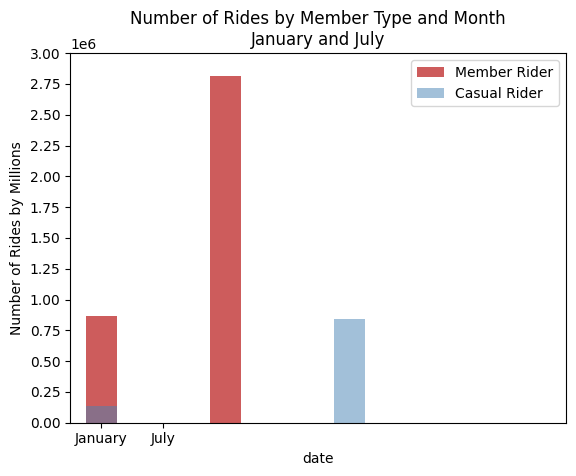

In [45]:
# Adopted from Prof Fed's code

#Memeber Rider Data
cbJanJul_m = cbJanJul[cbJanJul['member_casual'] == 'member'].drop(["member_casual"], axis=1)
counts_m = cbJanJul_m['date'].groupby([cbJanJul_m['date'].dt.month]).count()
ax = counts_m.plot(kind="bar", color='IndianRed', label='Member Rider')

#Causual Rider Data
cbJanJul_c = cbJanJul[cbJanJul['member_casual'] == 'casual'].drop(["member_casual"], axis=1)
counts_c = cbJanJul_c['date'].groupby([cbJanJul_c['date'].dt.month]).count()

ax = counts_c.plot(kind="bar", color='SteelBlue', alpha=0.5, label='Casual Rider', ax=ax)

# Customize x-axis labels for months (January and July)
ax.set_xticks([0, 1])
ax.set_xticklabels(['January', 'July'], rotation=0)

# Set y-axis limits to fit everything
ax.set_ylim(0, 3000000)
plt.yticks(range(0, 3000001, 250000))

# Set plot labels and title
plt.legend()
plt.title("Number of Rides by Member Type and Month\nJanuary and July")
plt.ylabel("Number of Rides by Millions")


#Still pretty ugly...

# Normalize for Proportions
Fraction of members in january and july and casual riders from january and july


In [59]:
#Make sure this wasn't overwritten
cbJanJul_m = cbJanJul[cbJanJul['member_casual'] == 'member']
cbJanJul_c = cbJanJul[cbJanJul['member_casual'] == 'casual']

norm_m = len(cbJanJul_m)
error_m_jan = cbJanJul_m[cbJanJul_m['month'] == 1].groupby(cbJanJul_m['date'].dt.day)['date'].count().std()
error_m_jul = cbJanJul_m[cbJanJul_m['month'] == 7].groupby(cbJanJul_m['date'].dt.day)['date'].count().std()

norm_m, error_m_jan, error_m_jul


(3682317, 5997.524766854428, 17026.594340391683)

In [60]:
norm_c = len(cbJanJul_c)
error_c_jan = cbJanJul_c[cbJanJul_c['month'] == 1].groupby(cbJanJul_c['date'].dt.day)['date'].count().std()
error_c_jul = cbJanJul_c[cbJanJul_c['month'] == 7].groupby(cbJanJul_c['date'].dt.day)['date'].count().std()


norm_c, error_c_jan, error_c_jul

(977264, 1724.3698471883788, 5871.23503301505)

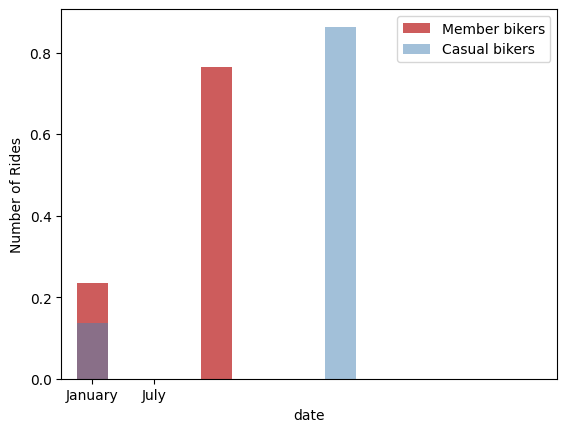

In [61]:
ax=((counts_m) / norm_m).plot(kind="bar",color='IndianRed', label='Member bikers')
(counts_c / norm_c).plot(kind="bar", alpha=0.5,
                           color='SteelBlue', label='Casual bikers', ax=ax)
ax.set_xticks([0, 1])
ax.set_xticklabels(['January', 'July'], rotation=0)
plt.ylabel("Number of Rides")
plt.legend()

# Test Proportions

Members: summer:0.764, winter:0.235, summer error:0.002, winter error:0.002
Casuals: summer:0.863, winter:0.136, summer error:0.002, winter error:0.002


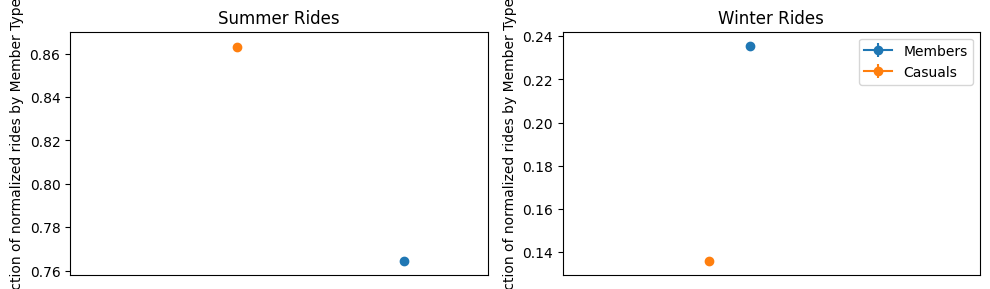

In [65]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

summer_m = counts_m[7] * 1.0 / norm_m #fraction of members riding in summer
winter_m = counts_m[1] * 1.0 / norm_m  #fraction of members riding in winter
esummer_m = error_m / norm_m  #error on fraction number of members riding in summer
ewinter_m = error_m / norm_m #error on fraction number of members riding in winter

summer_c = counts_c[7] * 1.0 / norm_c #fraction of casuals riding in summer
winter_c = counts_c[1] * 1.0 / norm_c    #fraction of casuals riding in winter
esummer_c = error_c / norm_c  #error on fraction number of casuals riding in summer
ewinter_c = error_c / norm_c #error on fraction number of casuals riding in winter

print("Members: summer:{0:.3f}, winter:{1:.3f}, summer error:{2:.3f}, winter error:{3:.3f}"\
      .format(summer_m, winter_m, esummer_m, ewinter_m))
print("Casuals: summer:{0:.3f}, winter:{1:.3f}, summer error:{2:.3f}, winter error:{3:.3f}"\
      .format(summer_c, winter_c, esummer_c, ewinter_c))

ax1.errorbar([0.4], [summer_m], yerr=[esummer_m], fmt='o-', label='Members')
ax1.errorbar([0.2], [summer_c], yerr=[esummer_c], fmt='o-', label='Casuals')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [winter_m], yerr=[ewinter_m], fmt='o-', label='Members')
ax2.errorbar([0.2], [winter_c], yerr=[ewinter_c], fmt='o-', label='Casuals')
ax2.set_xlim(0, 0.5)
ax1.set_title("Summer Rides")
ax2.set_title("Winter Rides")
ax1.set_ylabel("Fraction of normalized rides by Member Type")
ax2.set_ylabel("Fraction of normalized rides by Member Type")
ax1.set_xticks([])
ax2.set_xticks([])
plt.xlim(-0.5, 1.5)
plt.legend()
plt.tight_layout()
plt.show()


#WHY ARE THERE NO LINES?
#Because there's only one month vs 7 days?

# Z Test
To be run Next Week